In [50]:
import pandas as pd
import plotly.express as px
import random

In [51]:
def generate_doors(rng, num_doors):
    doors = [0 for _ in range(num_doors)]
    doors[0] = 1
    rng.shuffle(doors)
    return doors

In [52]:
def choose_door(rng, num_doors):
    return rng.choice(range(num_doors))

In [53]:
def choose_unopened_door(rng, doors, choice):
    if doors[choice] == 1:
        idx = list(range(len(doors)))
        idx.remove(choice)
        return rng.choice(idx)
    return doors.index(1)

In [54]:
def run_sim(rng, n, num_doors):
    results_df = pd.DataFrame({"prize": [], "choice": [], "unopened": []}, dtype=int)
    for _ in range(n):
        doors = generate_doors(rng, num_doors)
        choice = choose_door(rng, num_doors)
        unopened = choose_unopened_door(rng, doors, choice)
        results_df = results_df.append({
            "prize": doors.index(1),
            "choice": choice, 
            "unopened": unopened
        }, ignore_index=True)
    results_df["chose_prize"] = results_df["prize"] == results_df["choice"]
    return results_df

In [55]:
n = 1000
rng = random.Random(42)
results = run_sim(rng, n, 3)
results

,prize,choice,unopened,chose_prize
0,1,0,1,False
1,0,0,1,True
2,2,2,0,True
3,0,0,1,True
4,2,0,2,False
...,...,...,...,...
995,1,0,1,False
996,2,1,2,False
997,2,2,0,True
998,1,0,1,False


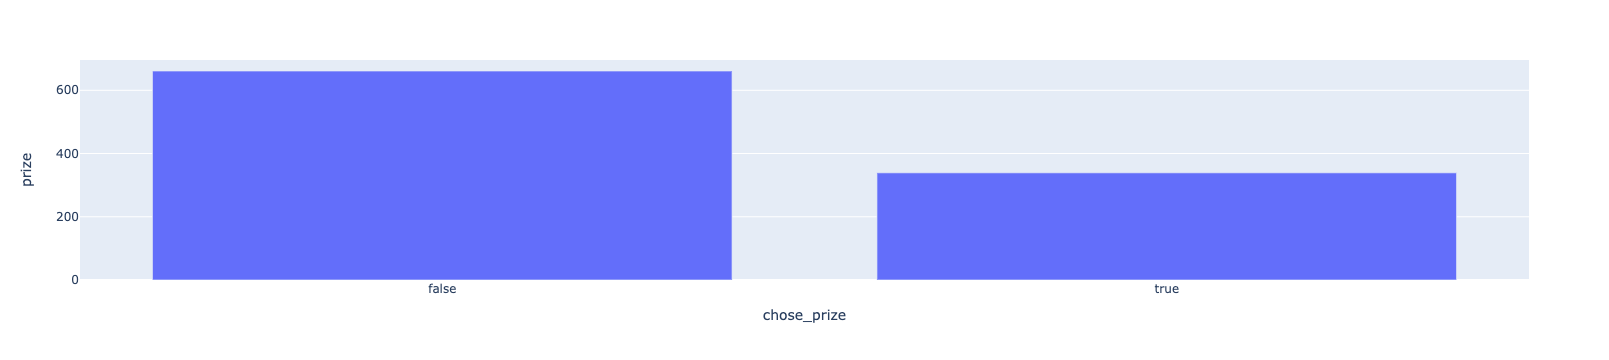

In [57]:
fig = px.bar(results.groupby("chose_prize").count().reset_index(), x="chose_prize", y="prize")
fig.write_html("figures/3_doors.html")
fig.show()